<a href="https://colab.research.google.com/github/nrmalfn/meta-ads-abtest/blob/main/Meta_Ads_A_B_Testing_Project_by_Alfina_Nurmayati.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# DATA UNDERSTANDING AND PROCESSING

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


### Description

**Campaign name**: Name of the marketing campaign, useful for organizing and tracking multiple campaigns.

**Ad Set Name**: The name of a specific group of ads within the campaign, often targeting specific audiences or goals.

**Ads**: The identifier or title of individual advertisements within the ad set.

**Ad name**: Specific name for the advertisement to differentiate between creatives or variations.

**Objective**: The goal of the campaign

**Day**: Date or time period during which the data was collected.

**Gender**: Gender targeted by the campaign.

**Age**: Age group targeted by the campaign.

**Delivery status**: Status of the campaign's delivery.

**Delivery level**: Level of delivery, often referring to whether the ad is under-delivering or over-delivering.

**Attribution setting**: Attribution model used to calculate results.

**Result type**: Type of outcome measured.

**Results**: Total number of the specific result achieved.

**Reach**: Unique number of people who saw the ad.

**Frequency**: Average number of times the ad was shown to each person.

**Cost per result**: Average cost to achieve one result, such as a purchase or signup.

**Amount spent (USD)**: Total budget spent for the campaign during the reporting period.

**Impressions**: Total number of times the ad was displayed (can include multiple views by the same user).

**CPM (cost per 1,000 impressions)**: Cost incurred to deliver 1,000 ad impressions.

**Link clicks**: Number of times users clicked on a link in the ad (e.g., to visit a website or landing page).


**CPC (cost per link click)**: Average cost incurred per link click.

**CTR (link click-through rate)**: Percentage of impressions that resulted in link clicks.

**Clicks (all)**: Total clicks on the ad, including link clicks and other interactions (e.g., likes, comments, shares).

**CTR (all)**: Overall click-through rate, which includes all types of clicks divided by impressions.

**CPC (all)**: Average cost incurred per click, considering all interactions.

**Landing page views**: Number of users who clicked on a link and waited for the landing page to load.

**Content views**: Number of times content on the website was viewed.

**Website content views**: Specific metric for views on website content.

**Checkouts Initiated**: Number of users who started a checkout process (this column has no data in this dataset).

**Website checkouts initiated**: Same as above but specific to website interactions.

**Adds of payment info**: Number of users who added payment details (also has no data here).

**Website adds of payment info**: Similar to the above but specific to websites.

**Purchase ROAS (return on ad spend)**: Revenue earned for every dollar spent on ads (no data in this dataset).

**Website purchase ROAS**: Return on ad spend specific to website purchases (no data).

**Purchases**: Number of purchases made (no data).

**Website purchases**: Purchases made through the website (no data).

**Objective.1**: Likely a duplicate or renamed version of the Objective column.

**Reporting starts**: Start date of the reporting period for the data collected.

**Reporting ends**: End date of the reporting period for the data collected.

In [ ]:
import pandas as pd
import numpy as np
import scipy.stats as stats
import matplotlib.pyplot as plt
import seaborn as sns

# Load the dataset
df = pd.read_csv('/content/drive/MyDrive/Dibimbing_assignment/assignment_abtest/DirtyA-B-testing.csv')

# Set options to display all columns
pd.set_option('display.max_columns', None)

# Preview the dataset
df.sample(10)


,Campaign name,Ad Set Name,Ads,Ad name,Objective,Day,Gender,Age,Delivery status,Delivery level,Attribution setting,Result type,Results,Reach,Frequency,Cost per result,Amount spent (USD),Impressions,"CPM (cost per 1,000 impressions)",Link clicks,CPC (cost per link click),CTR (link click-through rate),Clicks (all),CTR (all),CPC (all),Landing page views,Content views,Website content views,Checkouts Initiated,Website checkouts initiated,Adds of payment info,Website adds of payment info,Purchase ROAS (return on ad spend),Website purchase ROAS (return on ad spend),Purchases,Website purchases,Objective.1,Reporting starts,Reporting ends
610,Dirty A/B testing,HumanCustumer Group B,AmitJPWStudio_PQ_V1,AmitJPWStudio_PQ_V1,LINK_CLICKS,2024-11-28,male,55-64,not_delivering,ad,7-day click or 1-day view,NaN,NaN,10,1.000000,NaN,0.13,10,13.000000,NaN,NaN,NaN,0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,LINK_CLICKS,2024-11-28,2024-11-28
169,Dirty A/B testing,HumanCustumer Group B,AmitMyHome_PQ_V1,AmitMyHome_PQ_V1,LINK_CLICKS,2024-12-02,male,55-64,not_delivering,ad,7-day click or 1-day view,NaN,NaN,3,1.000000,NaN,0.02,3,6.666667,NaN,NaN,NaN,0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,LINK_CLICKS,2024-12-02,2024-12-02
126,Dirty A/B testing,Brand + Product Group A,JPWMainBrandingHard_PQ_V1 - Copy,JPWMainBrandingHard_PQ_V1 - Copy,LINK_CLICKS,2024-12-03,female,45-54,not_delivering,ad,7-day click or 1-day view,NaN,NaN,1,1.000000,NaN,0.02,1,20.000000,NaN,NaN,NaN,0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,LINK_CLICKS,2024-12-03,2024-12-03
414,Dirty A/B testing,Brand + Product Group B,JPWPoliWomanBack_PQ_V1,JPWPoliWomanBack_PQ_V1,LINK_CLICKS,2024-11-29,male,65+,not_delivering,ad,7-day click or 1-day view,NaN,NaN,17,1.294118,NaN,0.18,22,8.181818,NaN,NaN,NaN,0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,LINK_CLICKS,2024-11-29,2024-11-29
529,Dirty A/B testing,Brand + Product Group B,JPWMultipleframes,JPWMultipleframes,LINK_CLICKS,2024-11-28,female,35-44,not_delivering,ad,7-day click or 1-day view,NaN,NaN,1,1.000000,NaN,0.00,1,0.000000,NaN,NaN,NaN,0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,LINK_CLICKS,2024-11-28,2024-11-28
481,Dirty A/B testing,Brand + Product Group A,BanersFartoClose,BanersFartoClose,LINK_CLICKS,2024-11-29,female,25-34,not_delivering,ad,7-day click or 1-day view,NaN,NaN,4,1.500000,NaN,0.01,6,1.666667,NaN,NaN,NaN,0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,LINK_CLICKS,2024-11-29,2024-11-29
44,Dirty A/B testing,Brand + Product Group A,BanersFartoClose,BanersFartoClose,LINK_CLICKS,2024-12-04,unknown,45-54,not_delivering,ad,7-day click or 1-day view,NaN,NaN,3,1.000000,NaN,0.01,3,3.333333,NaN,NaN,NaN,0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,LINK_CLICKS,2024-12-04,2024-12-04
564,Dirty A/B testing,HumanCustumer Group B,AmitOpinion_PQ_V1,AmitOpinion_PQ_V1,LINK_CLICKS,2024-11-28,female,55-64,not_delivering,ad,7-day click or 1-day view,NaN,NaN,18,1.000000,NaN,0.10,18,5.555556,NaN,NaN,NaN,0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,LINK_CLICKS,2024-11-28,2024-11-28
196,Dirty A/B testing,HumanCustumer Group A,AmitHomeRealLife_PQ_V1,AmitHomeRealLife_PQ_V1,LINK_CLICKS,2024-12-02,female,65+,not_delivering,ad,7-day click or 1-day view,NaN,NaN,34,1.058824,NaN,0.36,36,10.000000,NaN,NaN,NaN,0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,LINK_CLICKS,2024-12-02,2024-12-02
224,Dirty A/B testing,Brand + Product Group A,BanersAClosetoFar,BanersAClosetoFar,LINK_CLICKS,2024-12-01,female,45-54,not_delivering,ad,7-day click or 1-day view,Link clicks,1.0,25,1.000000,0.13,0.13,25,5.200000,1.0,0.13,4.0,1,4.0,0.13,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,LINK_CLICKS,2024-12-01,2024-12-01


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 637 entries, 0 to 636
Data columns (total 39 columns):
 #   Column                                      Non-Null Count  Dtype  
---  ------                                      --------------  -----  
 0   Campaign name                               637 non-null    object 
 1   Ad Set Name                                 637 non-null    object 
 2   Ads                                         637 non-null    object 
 3   Ad name                                     637 non-null    object 
 4   Objective                                   637 non-null    object 
 5   Day                                         637 non-null    object 
 6   Gender                                      637 non-null    object 
 7   Age                                         637 non-null    object 
 8   Delivery status                             637 non-null    object 
 9   Delivery level                              637 non-null    object 
 10  Attribution se

**Objective and Result Type Overview**

Upon reviewing the Objective and Result Type columns in the dataset, it is clear that the goal of all the ads in this dataset is to drive users to click on the link of the advertisement. Both the Objective and Result Type columns contain only one unique value, which is "Link Clicks". This suggests that every ad in the dataset is aimed at increasing the number of link clicks.

In [ ]:
# Inspecting unique values for key metrics
print(df['Results'].unique())
print(df['Result type'].unique())
print(df['Objective'].unique())
print(df['Delivery status'].unique())
print(df['Delivery level'].unique())
print(df['Attribution setting'].unique())
print(df['Campaign name'].unique())
print(df['Ad Set Name'].unique())
print(df['Ads'].unique())
print(df['Ad name'].unique())
print(df['Gender'].unique())
print(df['Age'].unique())


[nan  8.  1.  2. 29.  9. 13. 57.  3. 52.  4. 15. 12.  6.  5.  7. 32. 16.
 51. 17. 19. 27. 50. 24. 38. 14. 47.]
[nan 'Link clicks']
['LINK_CLICKS']
['not_delivering']
['ad']
['7-day click or 1-day view']
['Dirty A/B testing']
['HumanCustumer Group A' 'Brand + Product Group A' 'HumanCustumer Group B'
 'Brand + Product Group B']
['AmitHomeRealLife_PQ_V1' 'BanersAClosetoFar' 'AmitJPWStudio_PQ_V1'
 'JPWABRanChill_PQ_V1' 'AmitMyHome_PQ_V1' 'AmitHomeTreeOfLife_PQ_V1'
 'BanersFartoClose' 'AmitHomeMini_PQ_V1' 'JPWPUnboxing_PQ_V1'
 'AmitOpinion_PQ_V1' 'JPWPoliWomanBack_PQ_V1'
 'JPWMainBrandingHard_PQ_V1 - Copy' 'JPWMiniHandsHome_PQ _V1'
 'JPWMultipleframes' 'AmitMyFirstPaint_PQ_V1']
['AmitHomeRealLife_PQ_V1' 'BanersAClosetoFar' 'AmitJPWStudio_PQ_V1'
 'JPWABRanChill_PQ_V1' 'AmitMyHome_PQ_V1' 'AmitHomeTreeOfLife_PQ_V1'
 'BanersFartoClose' 'AmitHomeMini_PQ_V1' 'JPWPUnboxing_PQ_V1'
 'AmitOpinion_PQ_V1' 'JPWPoliWomanBack_PQ_V1'
 'JPWMainBrandingHard_PQ_V1 - Copy' 'JPWMiniHandsHome_PQ _V1'
 'JPWMultip

In [ ]:
# Adjusting datatype
df['Reporting starts'] = pd.to_datetime(df['Reporting starts'])
df['Reporting ends'] = pd.to_datetime(df['Reporting ends'])

In [ ]:
df.isnull().sum()

,0
Campaign name,0
Ad Set Name,0
Ads,0
Ad name,0
Objective,0
Day,0
Gender,0
Age,0
Delivery status,0
Delivery level,0


**Dropping Columns**

*Redundant Columns:* Objective.1 (duplicate of Objective).

*Non-Traffic Metrics:* Clicks (all), CTR (all), CPC (all) (aggregated interactions unrelated to core traffic goals).

*Empty Columns:* Checkouts Initiated, Website checkouts initiated, Adds of payment info, Website adds of payment info,
Purchase ROAS, Website purchase ROAS, Purchases, Website purchases (100% null values).

In [ ]:
# Drop columns with 100% missing values
df = df.dropna(axis=1, how='all')

# Drop irrelevant columns
columns_to_drop = [
    'Objective.1', 'Clicks (all)',
    'CTR (all)', 'CPC (all)'
]
df = df.drop(columns=columns_to_drop, errors='ignore')

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 637 entries, 0 to 636
Data columns (total 27 columns):
 #   Column                            Non-Null Count  Dtype         
---  ------                            --------------  -----         
 0   Campaign name                     637 non-null    object        
 1   Ad Set Name                       637 non-null    object        
 2   Ads                               637 non-null    object        
 3   Ad name                           637 non-null    object        
 4   Objective                         637 non-null    object        
 5   Day                               637 non-null    object        
 6   Gender                            637 non-null    object        
 7   Age                               637 non-null    object        
 8   Delivery status                   637 non-null    object        
 9   Delivery level                    637 non-null    object        
 10  Attribution setting               637 non-null    

In [ ]:
df.describe()

,Results,Reach,Frequency,Cost per result,Amount spent (USD),Impressions,"CPM (cost per 1,000 impressions)",Link clicks,CPC (cost per link click),CTR (link click-through rate),Landing page views,Content views,Website content views,Reporting starts,Reporting ends
count,168.000000,637.000000,637.000000,168.000000,637.000000,637.000000,637.000000,168.000000,168.000000,168.000000,152.000000,68.000000,68.000000,637,637
mean,5.648810,34.492936,1.055095,0.257983,0.420958,36.984301,8.104639,5.648810,0.257983,10.600005,5.539474,4.470588,4.470588,2024-11-30 13:27:01.978021888,2024-11-30 13:27:01.978021888
min,1.000000,1.000000,1.000000,0.010000,0.000000,1.000000,0.000000,1.000000,0.010000,0.750469,1.000000,1.000000,1.000000,2024-11-28 00:00:00,2024-11-28 00:00:00
25%,1.000000,2.000000,1.000000,0.099167,0.010000,2.000000,2.000000,1.000000,0.099167,3.281250,1.000000,1.000000,1.000000,2024-11-29 00:00:00,2024-11-29 00:00:00
50%,2.000000,4.000000,1.000000,0.217115,0.030000,4.000000,7.500000,2.000000,0.217115,5.263158,2.000000,2.000000,2.000000,2024-11-30 00:00:00,2024-11-30 00:00:00
75%,4.000000,18.000000,1.055556,0.315246,0.160000,20.000000,11.333333,4.000000,0.315246,10.000000,4.000000,5.000000,5.000000,2024-12-02 00:00:00,2024-12-02 00:00:00
max,57.000000,941.000000,2.000000,1.690000,14.020000,1079.000000,70.000000,57.000000,1.690000,100.000000,52.000000,26.000000,26.000000,2024-12-04 00:00:00,2024-12-04 00:00:00
std,10.187547,98.667165,0.145805,0.221959,1.415331,107.581385,7.614512,10.187547,0.221959,16.881890,9.808688,5.636953,5.636953,NaN,NaN


In [ ]:
# Check if any value is already 0
print(df.eq(0).sum())

Campaign name                         0
Ad Set Name                           0
Ads                                   0
Ad name                               0
Objective                             0
Day                                   0
Gender                                0
Age                                   0
Delivery status                       0
Delivery level                        0
Attribution setting                   0
Result type                           0
Results                               0
Reach                                 0
Frequency                             0
Cost per result                       0
Amount spent (USD)                  140
Impressions                           0
CPM (cost per 1,000 impressions)    140
Link clicks                           0
CPC (cost per link click)             0
CTR (link click-through rate)         0
Landing page views                    0
Content views                         0
Website content views                 0


In [ ]:
# Check if there are missing (NaN) values
print(df.isnull().sum())

Campaign name                         0
Ad Set Name                           0
Ads                                   0
Ad name                               0
Objective                             0
Day                                   0
Gender                                0
Age                                   0
Delivery status                       0
Delivery level                        0
Attribution setting                   0
Result type                         469
Results                             469
Reach                                 0
Frequency                             0
Cost per result                     469
Amount spent (USD)                    0
Impressions                           0
CPM (cost per 1,000 impressions)      0
Link clicks                         469
CPC (cost per link click)           469
CTR (link click-through rate)       469
Landing page views                  485
Content views                       569
Website content views               569


In [ ]:
df.head()

,Campaign name,Ad Set Name,Ads,Ad name,Objective,Day,Gender,Age,Delivery status,Delivery level,Attribution setting,Result type,Results,Reach,Frequency,Cost per result,Amount spent (USD),Impressions,"CPM (cost per 1,000 impressions)",Link clicks,CPC (cost per link click),CTR (link click-through rate),Landing page views,Content views,Website content views,Reporting starts,Reporting ends
0,Dirty A/B testing,HumanCustumer Group A,AmitHomeRealLife_PQ_V1,AmitHomeRealLife_PQ_V1,LINK_CLICKS,2024-12-04,female,65+,not_delivering,ad,7-day click or 1-day view,NaN,NaN,4,1.000000,NaN,0.060000,4,15.000000,NaN,NaN,NaN,NaN,NaN,NaN,2024-12-04,2024-12-04
1,Dirty A/B testing,Brand + Product Group A,BanersAClosetoFar,BanersAClosetoFar,LINK_CLICKS,2024-12-04,female,65+,not_delivering,ad,7-day click or 1-day view,Link clicks,8.0,141,1.078014,0.225604,1.804833,152,11.873904,8.0,0.225604,5.263158,9.0,1.0,1.0,2024-12-04,2024-12-04
2,Dirty A/B testing,HumanCustumer Group B,AmitJPWStudio_PQ_V1,AmitJPWStudio_PQ_V1,LINK_CLICKS,2024-12-04,unknown,55-64,not_delivering,ad,7-day click or 1-day view,NaN,NaN,3,1.000000,NaN,0.030000,3,10.000000,NaN,NaN,NaN,1.0,NaN,NaN,2024-12-04,2024-12-04
3,Dirty A/B testing,HumanCustumer Group B,AmitJPWStudio_PQ_V1,AmitJPWStudio_PQ_V1,LINK_CLICKS,2024-12-04,female,35-44,not_delivering,ad,7-day click or 1-day view,Link clicks,1.0,5,1.000000,0.050000,0.050000,5,10.000000,1.0,0.050000,20.000000,1.0,NaN,NaN,2024-12-04,2024-12-04
4,Dirty A/B testing,HumanCustumer Group B,AmitJPWStudio_PQ_V1,AmitJPWStudio_PQ_V1,LINK_CLICKS,2024-12-04,female,25-34,not_delivering,ad,7-day click or 1-day view,Link clicks,1.0,4,1.000000,0.060000,0.060000,4,15.000000,1.0,0.060000,25.000000,1.0,NaN,NaN,2024-12-04,2024-12-04


**Missing Value Handling:**

Missing values in traffic metrics were imputed with 0 to align with business context (interpreting missing entries as "no user action") and ensure accurate aggregation of campaign performance KPIs.

In [ ]:
# Identify key metrics with >50% missing values
sparse_metrics = [
    'Landing page views', 'Content views', 'Website content views',
    'Cost per result', 'CTR (link click-through rate)', 'Link clicks',
    'Results', 'Impressions', 'CPC (cost per link click)'
]

# Check missingness
missing_percent = df[sparse_metrics].isnull().mean()
print(missing_percent[missing_percent > 0.5])

Landing page views               0.761381
Content views                    0.893250
Website content views            0.893250
Cost per result                  0.736264
CTR (link click-through rate)    0.736264
Link clicks                      0.736264
Results                          0.736264
CPC (cost per link click)        0.736264
dtype: float64


In [ ]:
# Columns where missing values should be imputed with 0
columns_to_impute = [
     'Landing page views',
     'Content views',
     'Website content views',
     'Cost per result',
     'CTR (link click-through rate)',
     'Link clicks',
     'Results',
     'Impressions',
     'CPC (cost per link click)'

  ]
# Perform the imputation with 0
df[columns_to_impute] = df[columns_to_impute].fillna(0)

# Verify that missing values have been replaced
print(df[columns_to_impute].isnull().sum())

Landing page views               0
Content views                    0
Website content views            0
Cost per result                  0
CTR (link click-through rate)    0
Link clicks                      0
Results                          0
Impressions                      0
CPC (cost per link click)        0
dtype: int64


In [ ]:
df.head()

,Campaign name,Ad Set Name,Ads,Ad name,Objective,Day,Gender,Age,Delivery status,Delivery level,Attribution setting,Result type,Results,Reach,Frequency,Cost per result,Amount spent (USD),Impressions,"CPM (cost per 1,000 impressions)",Link clicks,CPC (cost per link click),CTR (link click-through rate),Landing page views,Content views,Website content views,Reporting starts,Reporting ends
0,Dirty A/B testing,HumanCustumer Group A,AmitHomeRealLife_PQ_V1,AmitHomeRealLife_PQ_V1,LINK_CLICKS,2024-12-04,female,65+,not_delivering,ad,7-day click or 1-day view,NaN,0.0,4,1.000000,0.000000,0.060000,4,15.000000,0.0,0.000000,0.000000,0.0,0.0,0.0,2024-12-04,2024-12-04
1,Dirty A/B testing,Brand + Product Group A,BanersAClosetoFar,BanersAClosetoFar,LINK_CLICKS,2024-12-04,female,65+,not_delivering,ad,7-day click or 1-day view,Link clicks,8.0,141,1.078014,0.225604,1.804833,152,11.873904,8.0,0.225604,5.263158,9.0,1.0,1.0,2024-12-04,2024-12-04
2,Dirty A/B testing,HumanCustumer Group B,AmitJPWStudio_PQ_V1,AmitJPWStudio_PQ_V1,LINK_CLICKS,2024-12-04,unknown,55-64,not_delivering,ad,7-day click or 1-day view,NaN,0.0,3,1.000000,0.000000,0.030000,3,10.000000,0.0,0.000000,0.000000,1.0,0.0,0.0,2024-12-04,2024-12-04
3,Dirty A/B testing,HumanCustumer Group B,AmitJPWStudio_PQ_V1,AmitJPWStudio_PQ_V1,LINK_CLICKS,2024-12-04,female,35-44,not_delivering,ad,7-day click or 1-day view,Link clicks,1.0,5,1.000000,0.050000,0.050000,5,10.000000,1.0,0.050000,20.000000,1.0,0.0,0.0,2024-12-04,2024-12-04
4,Dirty A/B testing,HumanCustumer Group B,AmitJPWStudio_PQ_V1,AmitJPWStudio_PQ_V1,LINK_CLICKS,2024-12-04,female,25-34,not_delivering,ad,7-day click or 1-day view,Link clicks,1.0,4,1.000000,0.060000,0.060000,4,15.000000,1.0,0.060000,25.000000,1.0,0.0,0.0,2024-12-04,2024-12-04


In [ ]:
# Checking Duplicates
df.duplicated().sum()

0

**Outlier Handling:**

Outliers in metrics like Landing page views and CPC were not removed/modified because:

- Preserved real-world variability: Extreme values reflect authentic user behavior (e.g., viral ad spikes).

- Avoided zero inflation: IQR clipping forced values to 0, erasing meaningful performance signals.

- Statistical relevance: Non-parametric tests (Mann-Whitney U) are robust to outliers, ensuring valid results.

This prioritizes actionable insights (e.g., identifying high-performing outliers) over artificial data smoothing.



In [ ]:
df.describe()

,Results,Reach,Frequency,Cost per result,Amount spent (USD),Impressions,"CPM (cost per 1,000 impressions)",Link clicks,CPC (cost per link click),CTR (link click-through rate),Landing page views,Content views,Website content views,Reporting starts,Reporting ends
count,637.000000,637.000000,637.000000,637.000000,637.000000,637.000000,637.000000,637.000000,637.000000,637.000000,637.000000,637.000000,637.000000,637,637
mean,1.489796,34.492936,1.055095,0.068039,0.420958,36.984301,8.104639,1.489796,0.068039,2.795606,1.321821,0.477237,0.477237,2024-11-30 13:27:01.978021888,2024-11-30 13:27:01.978021888
min,0.000000,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2024-11-28 00:00:00,2024-11-28 00:00:00
25%,0.000000,2.000000,1.000000,0.000000,0.010000,2.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2024-11-29 00:00:00,2024-11-29 00:00:00
50%,0.000000,4.000000,1.000000,0.000000,0.030000,4.000000,7.500000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2024-11-30 00:00:00,2024-11-30 00:00:00
75%,1.000000,18.000000,1.055556,0.020000,0.160000,20.000000,11.333333,1.000000,0.020000,1.250000,0.000000,0.000000,0.000000,2024-12-02 00:00:00,2024-12-02 00:00:00
max,57.000000,941.000000,2.000000,1.690000,14.020000,1079.000000,70.000000,57.000000,1.690000,100.000000,52.000000,26.000000,26.000000,2024-12-04 00:00:00,2024-12-04 00:00:00
std,5.784275,98.667165,0.145805,0.160873,1.415331,107.581385,7.614512,5.784275,0.160873,9.832943,5.331617,2.292632,2.292632,NaN,NaN


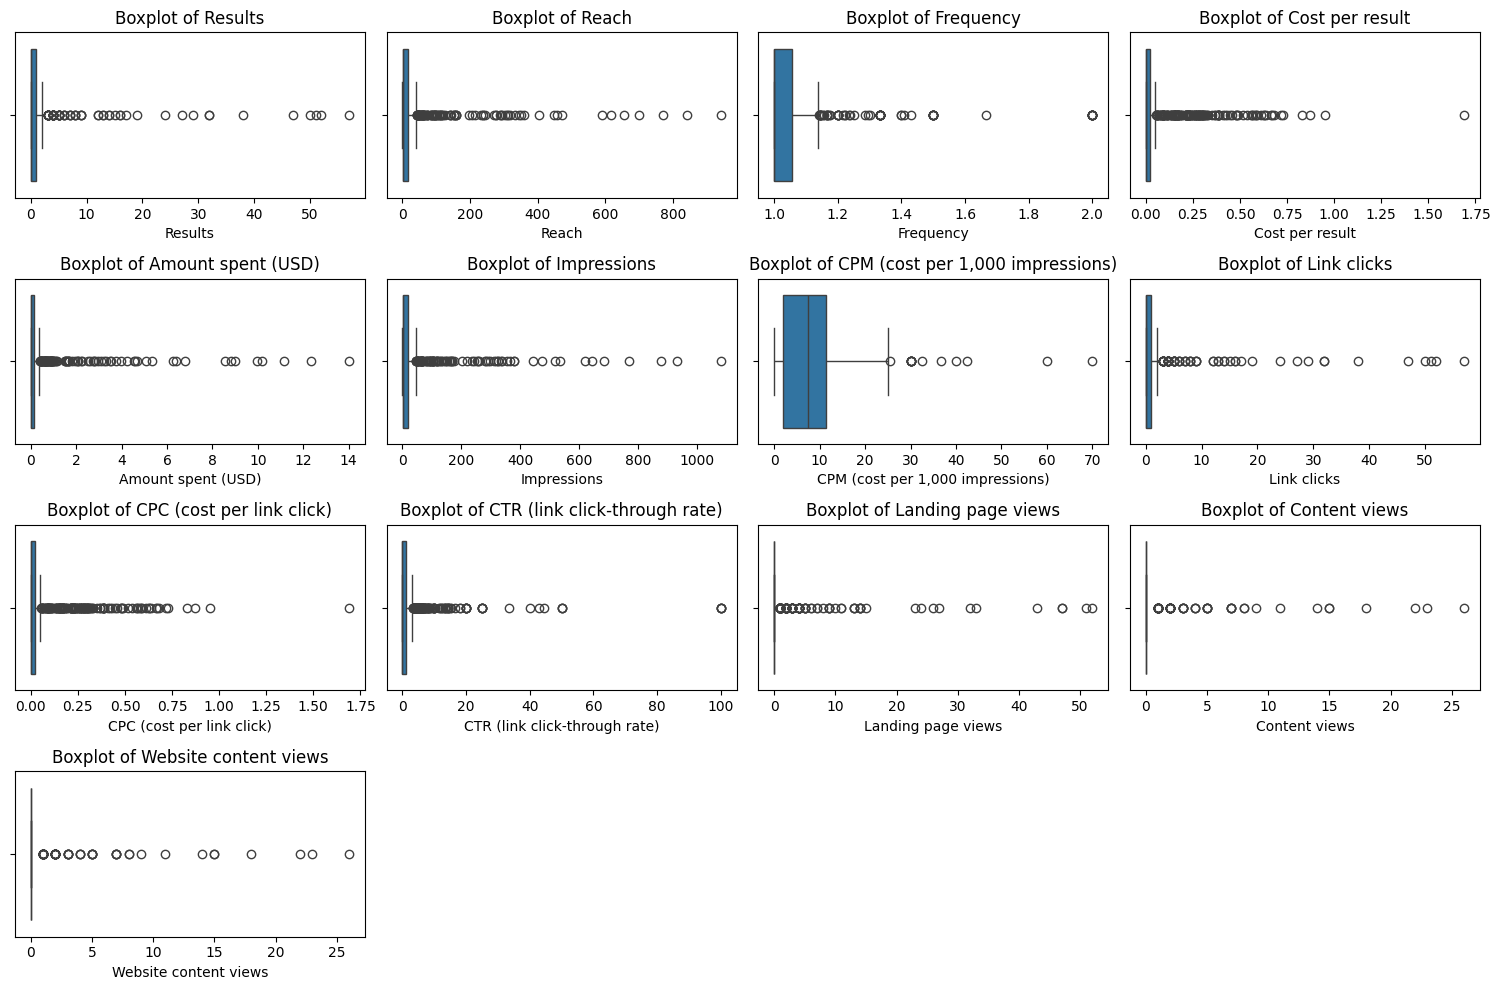

In [ ]:
# List of numerical columns to check for outliers
numerical_columns = [
    'Results', 'Reach', 'Frequency', 'Cost per result', 'Amount spent (USD)',
    'Impressions', 'CPM (cost per 1,000 impressions)', 'Link clicks',
    'CPC (cost per link click)', 'CTR (link click-through rate)', 'Landing page views', 'Content views',
    'Website content views'
]

# Visualize outliers using boxplots
plt.figure(figsize=(15, 10))

for i, column in enumerate(numerical_columns, 1):
    plt.subplot(4, 4, i)
    sns.boxplot(x=df[column])
    plt.title(f"Boxplot of {column}")

plt.tight_layout()
plt.show()


In [ ]:
# Outlier Handling with IQR Method
# def handle_outliers(df, column):
    # """
    # Handles outliers in a given column using the IQR method.
    # Values below Q1 - 1.5 * IQR or above Q3 + 1.5 * IQR are replaced with the respective bounds.
    # """
    # Q1 = df[column].quantile(0.25)
    # Q3 = df[column].quantile(0.75)
    # IQR = Q3 - Q1
    # lower_bound = Q1 - 1.5 * IQR
    # upper_bound = Q3 + 1.5 * IQR
#
    # Replace outliers with the bounds
    # df[column] = df[column].clip(lower=lower_bound, upper=upper_bound)

# Apply the function to each numerical column
# for column in numerical_columns:
    # if column in df.columns:  # Ensure the column exists in the dataset
        # handle_outliers(df, column)

# Verify if outliers are handled
# print("Outlier handling completed. Here is the summary statistics after processing:")
# df[numerical_columns].describe()

In [ ]:
df.head(20)

,Campaign name,Ad Set Name,Ads,Ad name,Objective,Day,Gender,Age,Delivery status,Delivery level,Attribution setting,Result type,Results,Reach,Frequency,Cost per result,Amount spent (USD),Impressions,"CPM (cost per 1,000 impressions)",Link clicks,CPC (cost per link click),CTR (link click-through rate),Landing page views,Content views,Website content views,Reporting starts,Reporting ends
0,Dirty A/B testing,HumanCustumer Group A,AmitHomeRealLife_PQ_V1,AmitHomeRealLife_PQ_V1,LINK_CLICKS,2024-12-04,female,65+,not_delivering,ad,7-day click or 1-day view,NaN,0.0,4,1.000000,0.000000,0.060000,4,15.000000,0.0,0.000000,0.000000,0.0,0.0,0.0,2024-12-04,2024-12-04
1,Dirty A/B testing,Brand + Product Group A,BanersAClosetoFar,BanersAClosetoFar,LINK_CLICKS,2024-12-04,female,65+,not_delivering,ad,7-day click or 1-day view,Link clicks,8.0,141,1.078014,0.225604,1.804833,152,11.873904,8.0,0.225604,5.263158,9.0,1.0,1.0,2024-12-04,2024-12-04
2,Dirty A/B testing,HumanCustumer Group B,AmitJPWStudio_PQ_V1,AmitJPWStudio_PQ_V1,LINK_CLICKS,2024-12-04,unknown,55-64,not_delivering,ad,7-day click or 1-day view,NaN,0.0,3,1.000000,0.000000,0.030000,3,10.000000,0.0,0.000000,0.000000,1.0,0.0,0.0,2024-12-04,2024-12-04
3,Dirty A/B testing,HumanCustumer Group B,AmitJPWStudio_PQ_V1,AmitJPWStudio_PQ_V1,LINK_CLICKS,2024-12-04,female,35-44,not_delivering,ad,7-day click or 1-day view,Link clicks,1.0,5,1.000000,0.050000,0.050000,5,10.000000,1.0,0.050000,20.000000,1.0,0.0,0.0,2024-12-04,2024-12-04
4,Dirty A/B testing,HumanCustumer Group B,AmitJPWStudio_PQ_V1,AmitJPWStudio_PQ_V1,LINK_CLICKS,2024-12-04,female,25-34,not_delivering,ad,7-day click or 1-day view,Link clicks,1.0,4,1.000000,0.060000,0.060000,4,15.000000,1.0,0.060000,25.000000,1.0,0.0,0.0,2024-12-04,2024-12-04
5,Dirty A/B testing,HumanCustumer Group B,AmitJPWStudio_PQ_V1,AmitJPWStudio_PQ_V1,LINK_CLICKS,2024-12-04,male,55-64,not_delivering,ad,7-day click or 1-day view,Link clicks,2.0,10,1.000000,0.045000,0.090000,10,9.000000,2.0,0.045000,20.000000,2.0,0.0,0.0,2024-12-04,2024-12-04
6,Dirty A/B testing,HumanCustumer Group B,AmitJPWStudio_PQ_V1,AmitJPWStudio_PQ_V1,LINK_CLICKS,2024-12-04,female,65+,not_delivering,ad,7-day click or 1-day view,Link clicks,29.0,293,1.020478,0.157931,4.580000,299,15.317726,29.0,0.157931,9.698997,27.0,11.0,11.0,2024-12-04,2024-12-04
7,Dirty A/B testing,HumanCustumer Group B,AmitJPWStudio_PQ_V1,AmitJPWStudio_PQ_V1,LINK_CLICKS,2024-12-04,female,55-64,not_delivering,ad,7-day click or 1-day view,Link clicks,9.0,142,1.021127,0.232222,2.090000,145,14.413793,9.0,0.232222,6.206897,9.0,5.0,5.0,2024-12-04,2024-12-04
8,Dirty A/B testing,HumanCustumer Group B,AmitJPWStudio_PQ_V1,AmitJPWStudio_PQ_V1,LINK_CLICKS,2024-12-04,unknown,65+,not_delivering,ad,7-day click or 1-day view,Link clicks,2.0,5,1.000000,0.050000,0.100000,5,20.000000,2.0,0.050000,40.000000,2.0,1.0,1.0,2024-12-04,2024-12-04
9,Dirty A/B testing,HumanCustumer Group B,AmitJPWStudio_PQ_V1,AmitJPWStudio_PQ_V1,LINK_CLICKS,2024-12-04,female,45-54,not_delivering,ad,7-day click or 1-day view,Link clicks,2.0,31,1.032258,0.110000,0.220000,32,6.875000,2.0,0.110000,6.250000,2.0,1.0,1.0,2024-12-04,2024-12-04


**Data Filtering for Hypothesis Testing:**
- The dataset was filtered to include only rows with valid Landing page views because:

- Focus on measurable traffic: Ensures analysis only compares ad sets that actually drove users to the landing page.

- Avoid skewed comparisons: Missing values represent no traffic, which would distort group performance metrics if included as zeros.

- Statistical rigor: Non-parametric tests (Mann-Whitney U) require comparable, action-based data for valid A/B comparisons.

This ensures results reflect real user behavior and actionable campaign insights.

In [ ]:
 # Filter the dataset to include only relevant rows
df_filtered = df[df['Landing page views'].notnull()]

In [ ]:
df_filtered.groupby('Ad Set Name')['Landing page views'].count()

,Landing page views
Ad Set Name,
Brand + Product Group A,282
Brand + Product Group B,123
HumanCustumer Group A,37
HumanCustumer Group B,195


In [ ]:
df_filtered.to_csv('Revised_metaads_abtest.csv', index=False)

**Hypothesis Testing Approach:**

- Group Separation: Isolated HumanCustomer A/B and Brand + Product A/B groups to compare traffic performance independently.

- Normality Check (Shapiro-Wilk): Confirmed non-normal distributions (p < 0.05), rejecting parametric tests (e.g., t-tests).

- Mann-Whitney U Test: Chosen for its robustness to non-normal data and outliers and compares median ranks rather than means, aligning with skewed traffic metrics.


In [ ]:
# Separate the groups for testing
# Group 1: HumanCustomer A vs. HumanCustomer B
human_customer_a = df_filtered[df_filtered['Ad Set Name'] == 'HumanCustumer Group A']['Landing page views']
human_customer_b = df_filtered[df_filtered['Ad Set Name'] == 'HumanCustumer Group B']['Landing page views']

# Group 2: Brand + Product Group A vs. Brand + Product Group B
brand_product_a = df_filtered[df_filtered['Ad Set Name'] == 'Brand + Product Group A']['Landing page views']
brand_product_b = df_filtered[df_filtered['Ad Set Name'] == 'Brand + Product Group B']['Landing page views']

In [ ]:
# Test normality for each group (Shapiro-Wilk test)
groups = {
    "HumanCustumer Group A": human_customer_a,
    "HumanCustumer Group B": human_customer_b,
    "Brand + Product Group A": brand_product_a,
    "Brand + Product Group B": brand_product_b
}

print("Shapiro-Wilk Test for Normality:")
for name, group in groups.items():
    shapiro_test = stats.shapiro(group)
    print(f"{name}: W={shapiro_test.statistic}, p-value={shapiro_test.pvalue}")

# Perform hypothesis testing
alpha = 0.05  # Significance level

def perform_test(group1, group2, group1_name, group2_name):
    """
    Perform hypothesis testing between two groups.
    """
    print(f"\nHypothesis Testing: {group1_name} vs. {group2_name}")

    # Check for normality to decide between parametric or non-parametric test
    group1_normal = stats.shapiro(group1).pvalue > alpha
    group2_normal = stats.shapiro(group2).pvalue > alpha

    if group1_normal and group2_normal:
        # Use T-Test (parametric)
        t_test = stats.ttest_ind(group1, group2, equal_var=False)  # Welch's t-test
        test_name = "T-Test"
        stat, p_value = t_test.statistic, t_test.pvalue
    else:
        # Use Mann-Whitney U Test (non-parametric)
        mann_whitney = stats.mannwhitneyu(group1, group2, alternative='two-sided')
        test_name = "Mann-Whitney U Test"
        stat, p_value = mann_whitney.statistic, mann_whitney.pvalue

    # Print results
    print(f"{test_name} Results:")
    print(f"Statistic={stat}, p-value={p_value}")

    # Conclusion
    if p_value < alpha:
        print(f"Reject H0: There is a significant difference between {group1_name} and {group2_name} (p={p_value:.4f}).")
    else:
        print(f"Fail to Reject H0: No significant difference between {group1_name} and {group2_name} (p={p_value:.4f}).")

# Perform tests for both group comparisons
perform_test(human_customer_a, human_customer_b, "HumanCustomer A", "HumanCustomer B")
perform_test(brand_product_a, brand_product_b, "Brand + Product Group A", "Brand + Product Group B")

Shapiro-Wilk Test for Normality:
HumanCustumer Group A: W=0.3666225773716433, p-value=1.797986128403841e-11
HumanCustumer Group B: W=0.3182244580046971, p-value=2.0391672504843025e-26
Brand + Product Group A: W=0.2726087799732444, p-value=8.587993792213188e-32
Brand + Product Group B: W=0.33716522494644385, p-value=3.655378356178586e-21

Hypothesis Testing: HumanCustomer A vs. HumanCustomer B
Mann-Whitney U Test Results:
Statistic=2732.5, p-value=0.0037894859138415146
Reject H0: There is a significant difference between HumanCustomer A and HumanCustomer B (p=0.0038).

Hypothesis Testing: Brand + Product Group A vs. Brand + Product Group B
Mann-Whitney U Test Results:
Statistic=18859.5, p-value=0.0470406764596417
Reject H0: There is a significant difference between Brand + Product Group A and Brand + Product Group B (p=0.0470).


**Visualization for Further Analysis**

In [ ]:
# Check HumanCustomer Groups
print("HumanCustomer Group A median:", human_customer_a.median())
print("HumanCustomer Group B median:", human_customer_b.median())

# Check Brand+Product Groups
print("Brand+Product Group A median:", brand_product_a.median())
print("Brand+Product Group B median:", brand_product_b.median())

HumanCustomer Group A median: 0.0
HumanCustomer Group B median: 0.0
Brand+Product Group A median: 0.0
Brand+Product Group B median: 0.0


In [ ]:
human_medians = [human_customer_a.mean(), human_customer_b.mean()]
brand_medians = [brand_product_a.mean(), brand_product_b.mean()]

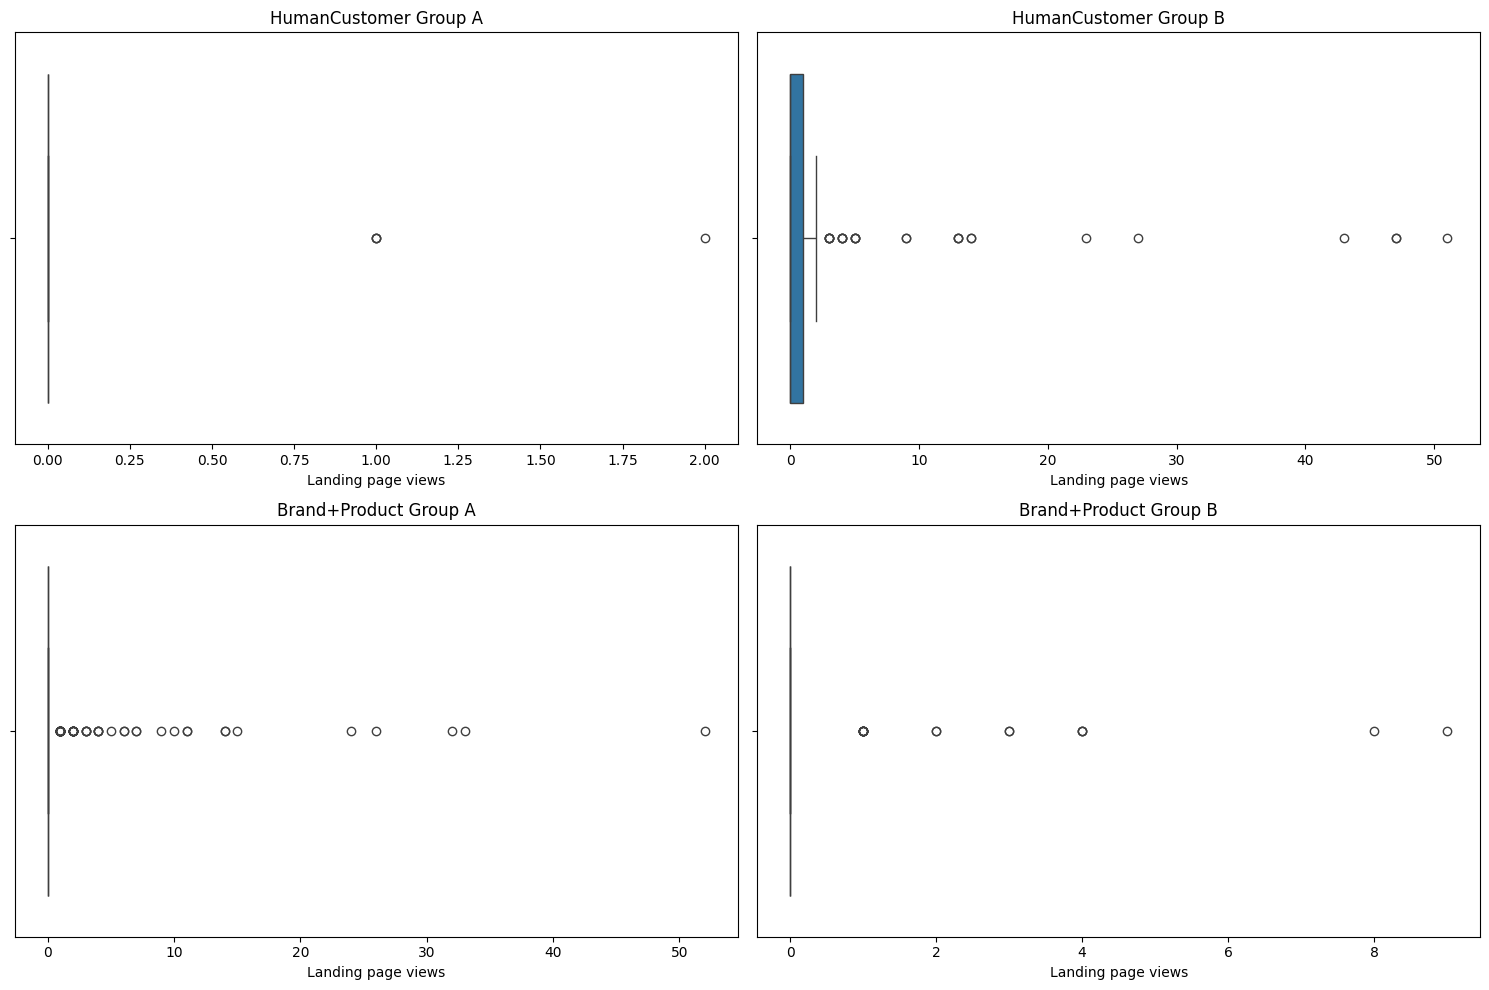

In [ ]:
# Group Comparisons (Means Landing Page Views)
def plot_distributions():
    fig, ax = plt.subplots(2, 2, figsize=(15, 10))

    # HumanCustomer Groups
    sns.boxplot(x=human_customer_a, ax=ax[0, 0])
    ax[0, 0].set_title('HumanCustomer Group A')
    sns.boxplot(x=human_customer_b, ax=ax[0, 1])
    ax[0, 1].set_title('HumanCustomer Group B')

    # Brand+Product Groups
    sns.boxplot(x=brand_product_a, ax=ax[1, 0])
    ax[1, 0].set_title('Brand+Product Group A')
    sns.boxplot(x=brand_product_b, ax=ax[1, 1])
    ax[1, 1].set_title('Brand+Product Group B')

    plt.tight_layout()
    plt.show()

plot_distributions()

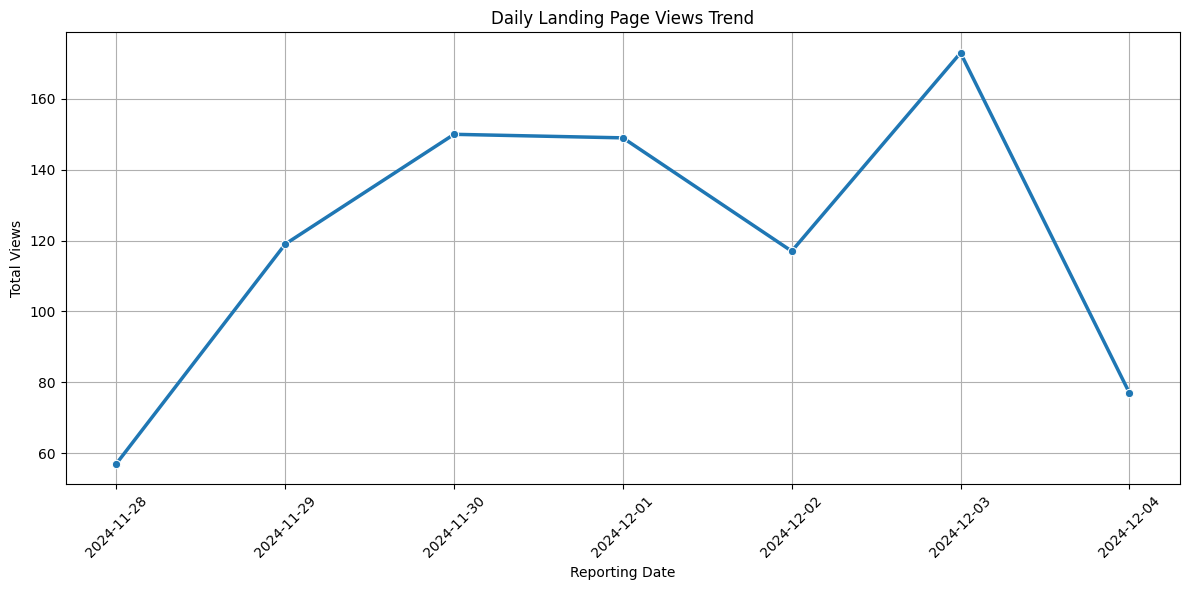

In [ ]:
# Trend Analysis (Time Series)
def plot_time_series(df):
    plt.figure(figsize=(12, 6))

    # Convert to daily trend
    df_daily = df.groupby(pd.Grouper(key='Reporting starts', freq='D'))['Landing page views'].sum().reset_index()

    sns.lineplot(x='Reporting starts', y='Landing page views', data=df_daily,
                 marker='o', linewidth=2.5)

    plt.title('Daily Landing Page Views Trend')
    plt.xlabel('Reporting Date')
    plt.ylabel('Total Views')
    plt.grid(True)
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()

plot_time_series(df_filtered)